<a href="https://colab.research.google.com/github/julianacarvajal1019/TALLER-FUNCIONES-GRUPO-10/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import get_ipython
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
import pandas as pd

df = pd.read_excel('/content/BD2025_01.xlsx', sheet_name='Total', engine='openpyxl')

# Procesamiento de fechas y orden
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date')
df = df.reset_index(drop=True)
# Convertir la columna de fechas al tipo datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Mostrar columnas
print(df.columns)
df.head()

Index(['Date', 'PFBCOLO ', 'BCOLO ', 'ECOPETL ', 'ISA ', 'GEB ', 'CEMARGOS ',
       'GRUPOARG ', 'PFGRUPSU ', 'PFGRUPOA ', 'PEI ', 'PFAVAL ', 'GRUPOSUR ',
       'PFDAVVND ', 'CELSIA ', 'CORFICOL ', 'GRUPOBOL ', 'PROMIG ', 'BOGOTA ',
       'MINEROS ', 'TERPEL ', 'PFCORCOL ', 'CNEC ', 'ETB ', 'COLCAP'],
      dtype='object')


,Date,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
0,2010-01-29,21760,22200,2455,12680,1198.0,6495.366,19980,NaN,NaN,...,10950.195,40000,4292.245,31473.509,5500,NaN,11264.812,NaN,1140.0,1363.67
1,2010-02-26,22220,22300,2560,12880,1234.0,6506.432,19300,NaN,NaN,...,12686.790,40000,4172.684,34898.567,5550,NaN,12330.403,NaN,1005.0,1391.02
2,2010-03-31,22280,22280,2700,12800,1250.0,6628.151,19800,NaN,NaN,...,13800.060,42500,4182.249,34528.290,5720,NaN,13540.856,NaN,1040.0,1440.58
3,2010-04-30,23000,23020,2765,12980,1290.0,6373.647,19400,NaN,NaN,...,14906.857,40600,4208.552,36842.519,5720,NaN,14579.233,NaN,1155.0,1467.26
4,2010-05-31,23500,23500,2700,12720,1275.4,6218.732,19200,NaN,NaN,...,14468.126,41420,4184.640,35916.827,5700,NaN,14159.686,NaN,1075.0,1444.54


In [12]:
rentabilidades = df.iloc[:, 1:].pct_change()
rentabilidades['Date'] = df['Date']

# **Calculo rentabilidades mensuales**

In [21]:
# Procesar fechas
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date').reset_index(drop=True)

# Calcular rentabilidad mensual para cada acción
rentabilidades = df.iloc[:, 1:].pct_change()
rentabilidades['Date'] = df['Date']

# Eliminar filas con valores NaN (por el primer mes)
rentabilidades.dropna(inplace=True)

# Mostrar las primeras filas
print(rentabilidades.head())

     PFBCOLO     BCOLO   ECOPETL       ISA       GEB   CEMARGOS   GRUPOARG   \
152 -0.083715 -0.090643 -0.081081 -0.139280 -0.015263  -0.031241   0.006154   
153  0.115275  0.141479  0.181292  0.167879 -0.119722  -0.014793   0.044852   
154  0.023680  0.126761 -0.065306  0.011936  0.092896   0.051952  -0.034146   
155  0.048765  0.062500  0.056769  0.076923 -0.065000   0.027691  -0.041414   
156  0.057824 -0.012000  0.102893 -0.093333 -0.067142  -0.107500  -0.013172   

     PFGRUPSU   PFGRUPOA       PEI   ...  GRUPOBOL    PROMIG    BOGOTA   \
152  -0.175258  -0.095023 -0.205447  ...  -0.039804 -0.120000 -0.286500   
153   0.067187  -0.016667 -0.059745  ...   0.147641  0.040670 -0.088998   
154  -0.048316   0.057627 -0.086458  ...   0.106762  0.080460  0.230769   
155   0.015385   0.017628  0.020239  ...  -0.019293 -0.029787  0.156250   
156  -0.069697  -0.133858 -0.033250  ...   0.000000 -0.002193 -0.042703   

     MINEROS    TERPEL   PFCORCOL      CNEC       ETB     COLCAP       Dat

# **Cálculos agregados sobre rentabilidades**

In [28]:
# Crear resumen de rentabilidad
resumen_rentabilidad = pd.DataFrame({
    'Rentabilidad Promedio': rentabilidades.mean(),
    'Rentabilidad Mínima': rentabilidades.min(),
    'Rentabilidad Máxima': rentabilidades.max(),
    # Calcular la rentabilidad acumulada para cada columna excluyendo la fecha
    'Rentabilidad Acumulada': (rentabilidades.drop('Date', axis=1) + 1).cumprod().iloc[-1] - 1
})

# Mostrar resultados
print(resumen_rentabilidad)

          Rentabilidad Promedio  Rentabilidad Mínima  Rentabilidad Máxima  \
BCOLO                  0.013306            -0.227778             0.146277   
BOGOTA                 -0.00178            -0.291925             0.292663   
CELSIA                 0.006925            -0.147059             0.233333   
CEMARGOS                0.04436            -0.180226             0.691937   
CNEC                  -0.034519            -0.382603             0.330396   
COLCAP                 0.010213            -0.083919             0.103046   
CORFICOL               0.006314             -0.34375             0.222222   
Date        2023-12-15 02:24:00  2022-09-30 00:00:00  2025-02-28 00:00:00   
ECOPETL               -0.000072             -0.11014             0.181292   
ETB                   -0.026528            -0.181818             0.207116   
GEB                    0.016818            -0.119722             0.197368   
GRUPOARG               0.027163            -0.166925             0.194231   

# **Análisis exploratorio**

In [98]:
# Acción con mayor rentabilidad promedio mensual
mean_returns = rentabilidades.drop('Date', axis=1).mean()
accion_mejor_promedio = mean_returns.idxmax()
rentabilidad_mejor_promedio = mean_returns.max()

# Acción con el mayor valor de rentabilidad mensual positiva
max_returns = rentabilidades.drop('Date', axis=1).max()
accion_max_rentabilidad = max_returns.idxmax()
valor_max_rentabilidad = max_returns.max()

# Acción con la mayor rentabilidad acumulada total
rentabilidad_acumulada = (rentabilidades.iloc[:, :-1] + 1).cumprod().iloc[-1] - 1
accion_max_acumulada = rentabilidad_acumulada.idxmax()
valor_max_acumulada = rentabilidad_acumulada.max()

# Meses con rentabilidad negativa por acción
meses_negativos = (rentabilidades.iloc[:, :-1] < 0).sum()

# Acción más volátil (Mayor desviación estándar)
std_returns = rentabilidades.drop('Date', axis=1).std()
accion_mas_volatil = std_returns.idxmax()
desviacion_mayor = std_returns.max()

# Acciones con más del 70% de meses con rentabilidad positiva
acciones_rentabilidad_positiva = (rentabilidades.iloc[:, :-1] > 0).mean() > 0.7
acciones_positivas = acciones_rentabilidad_positiva[acciones_rentabilidad_positiva].index.tolist()

# Generar reporte textual
analisis_textual = f"""
Análisis de Rentabilidad en el Índice COLCAP (2010-2025)

Acción con mayor rentabilidad promedio mensual: {accion_mejor_promedio} ({rentabilidad_mejor_promedio:.2%})
Acción con el mayor valor de rentabilidad mensual positiva en algún mes: {accion_max_rentabilidad} ({valor_max_rentabilidad:.2%})
Acción con la mayor rentabilidad acumulada total: {accion_max_acumulada} ({valor_max_acumulada:.2%})
Meses con rentabilidad negativa por acción:
{meses_negativos.to_string()}

Acción más volátil: {accion_mas_volatil} (Desviación estándar: {desviacion_mayor:.2%})
"""
# Mostrar análisis
print(analisis_textual)



Análisis de Rentabilidad en el Índice COLCAP (2010-2025)

Acción con mayor rentabilidad promedio mensual: PEI (1.71%)
Acción con el mayor valor de rentabilidad mensual positiva en algún mes: CEMARGOS (69.19%)
Acción con la mayor rentabilidad acumulada total: GEB (139.98%)
Meses con rentabilidad negativa por acción:
PFBCOLO      78
BCOLO        83
ECOPETL      83
ISA          85
GEB          83
CEMARGOS     85
GRUPOARG     83
PFGRUPSU     74
PFGRUPOA     72
PEI          15
PFAVAL       82
GRUPOSUR     89
PFDAVVND     80
CELSIA       91
CORFICOL     78
GRUPOBOL     87
PROMIG       80
BOGOTA       94
MINEROS      94
TERPEL       63
PFCORCOL     85
CNEC         94
ETB         105
COLCAP       86

Acción más volátil: PEI (Desviación estándar: 12.97%)



# **Visualización de resultados**

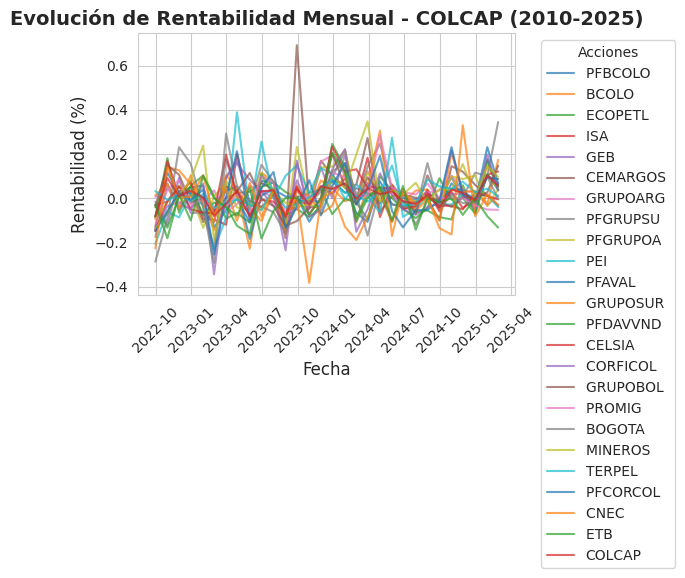

In [35]:
#Graficar cada acción
for col in rentabilidades.columns[:-1]:  # Excluir columna Date
    sns.lineplot(data=rentabilidades, x='Date', y=col, label=col, alpha=0.7)

# Personalización
plt.title("Evolución de Rentabilidad Mensual - COLCAP (2010-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rentabilidad (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Acciones")
plt.tight_layout()

# Mostrar gráfico
plt.show()

# **Gráfico de líneas**
Permitirá seleccionar tres acciones y graficar su evolución de rentabilidad desde 2010 hasta 2025.

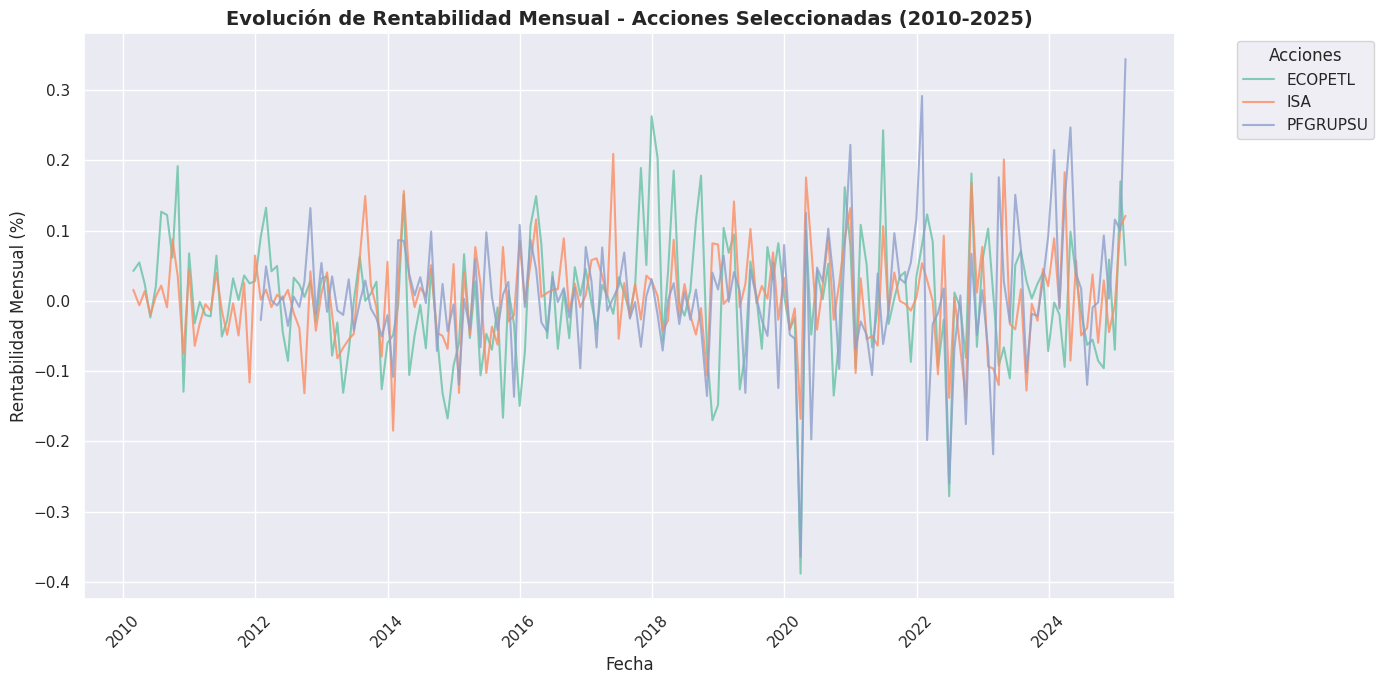

In [69]:
# Seleccionar acciones para analizar
acciones_seleccionadas = ['ECOPETL', 'ISA', 'PFGRUPSU']

sns.set_theme(style="darkgrid", palette="Set2")
plt.figure(figsize=(14, 7))

# Graficar
for accion in acciones_seleccionadas:
    if accion in rentabilidades.columns:
        sns.lineplot(data=rentabilidades, x='Date', y=accion, label=accion, alpha=0.8)
    else:
        print(f"Warning: Action '{accion}' not found in data columns.")
# Personalizar
plt.title("Evolución de Rentabilidad Mensual - Acciones Seleccionadas (2010-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Rentabilidad Mensual (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Acciones")
plt.tight_layout()


# Mostrar gráfico
plt.show()

# **Comparación de rentabilidad acumulada total entre todas las acciones**
Esto permite comparar el desempeño total.

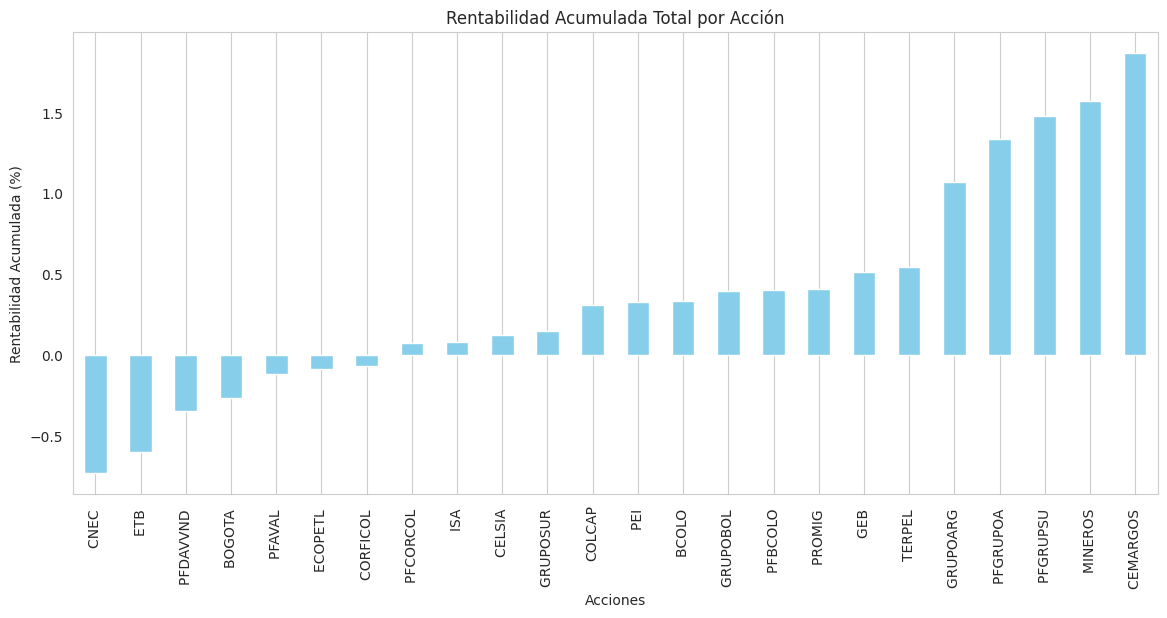

In [62]:
# Calcular rentabilidad acumulada
rentabilidad_acumulada = (rentabilidades.iloc[:, :-1] + 1).cumprod().iloc[-1] - 1

# Graficar rentabilidad acumulada por acción
plt.figure(figsize=(14, 6))
rentabilidad_acumulada.sort_values().plot(kind='bar', color='skyblue')

plt.title('Rentabilidad Acumulada Total por Acción')
plt.xlabel('Acciones')
plt.ylabel('Rentabilidad Acumulada (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# **Gráfico de caja (Boxplot): Distribución de rentabilidades mensuales por acción**
Muestra la dispersión de rentabilidades.

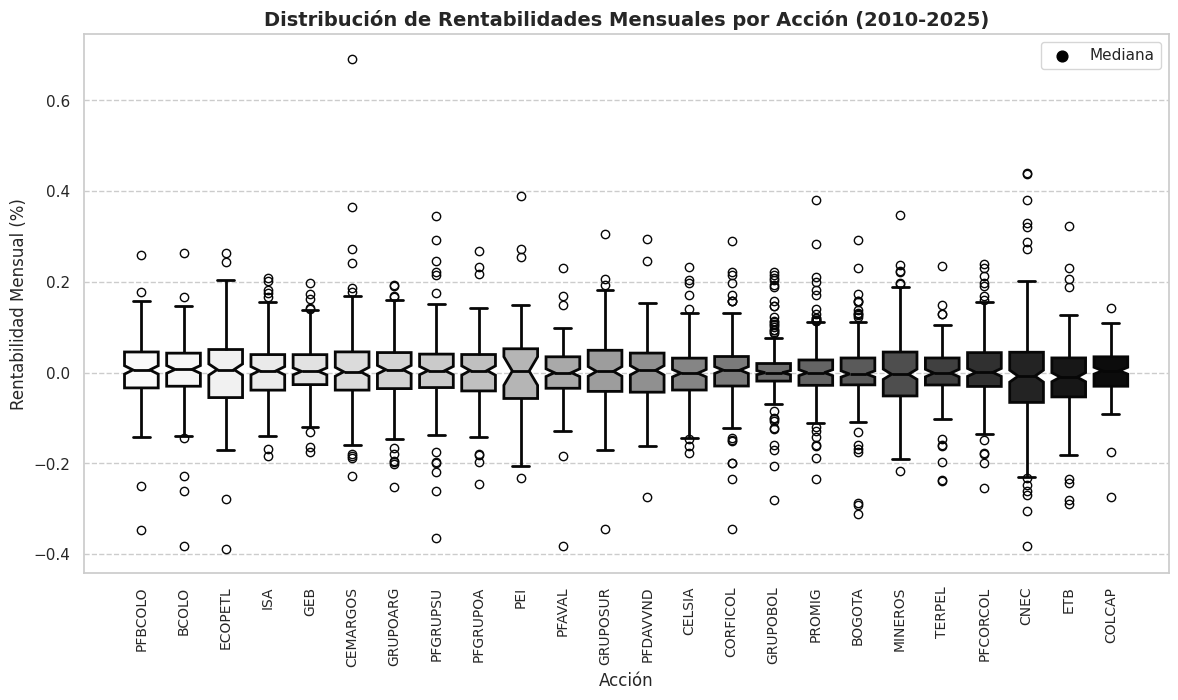

In [78]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Boxplot
sns.boxplot(data=rentabilidades.iloc[:, :-1], notch=True, showfliers=True, linewidth=2, palette="Greys")

# Resaltar medianas
medianas = rentabilidades.iloc[:, :-1].median()
plt.scatter(range(len(medianas)), medianas, color="black", marker="o", s=60, label="Mediana")

# Personalizar
plt.title("Distribución de Rentabilidades Mensuales por Acción (2010-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Acción", fontsize=12)
plt.ylabel("Rentabilidad Mensual (%)", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='dashed')

# Mostrar gráfico
plt.show()

# **Histograma: Distribución de todas las rentabilidades mensuales juntas**
Permite visualizar la dispersión y simetría de las rentabilidades.

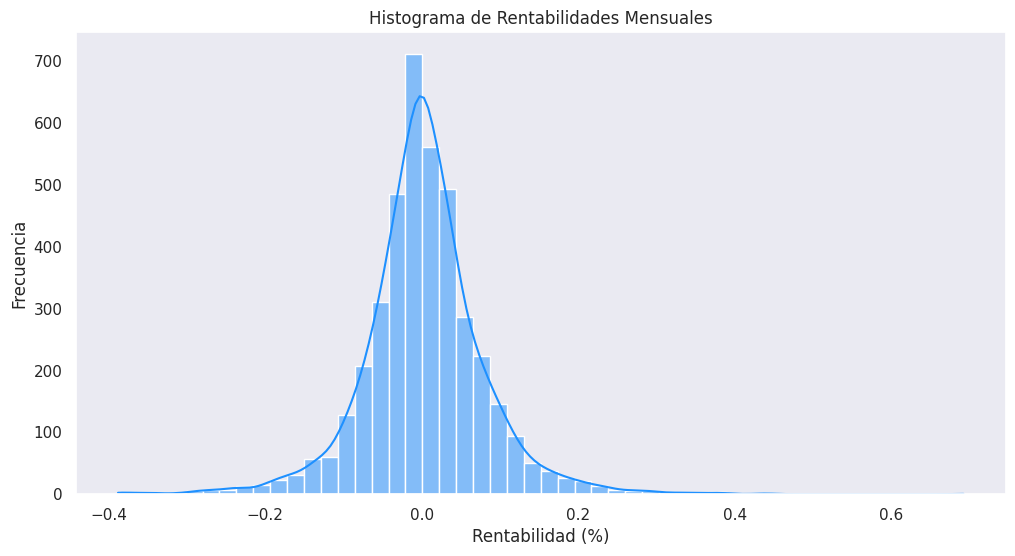

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(rentabilidades.iloc[:, :-1].stack(), bins=50, kde=True, color='dodgerblue')

plt.title('Histograma de Rentabilidades Mensuales')
plt.xlabel('Rentabilidad (%)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

In [57]:
# Generar análisis textual
analisis_textual = ""

# Identificar acciones con mayor volatilidad

volatilidad = rentabilidades.drop('Date', axis=1).std().sort_values(ascending=False)
accion_mas_volatil = volatilidad.index[0]
accion_menos_volatil = volatilidad.index[-1]

# Identificar acciones con mejor desempeño

mejor_rentabilidad_promedio = rentabilidades.drop('Date', axis=1).mean().idxmax()
peor_rentabilidad_promedio = rentabilidades.drop('Date', axis=1).mean().idxmin()

# Generar informe
analisis_textual += f"Análisis de Rentabilidad en el Índice COLCAP\n"
analisis_textual += f"La acción con mayor volatilidad es {accion_mas_volatil}, mientras que la menos volátil es {accion_menos_volatil}"
analisis_textual += f"La acción con mejor desempeño promedio es {mejor_rentabilidad_promedio}, mientras que la de peor desempeño es {peor_rentabilidad_promedio}."
analisis_textual += "El período de análisis muestra fluctuaciones significativas en ciertos sectores, con algunas acciones manteniendo una tendencia más estable."

# Mostrar el análisis
print(analisis_textual)

Análisis de Rentabilidad en el Índice COLCAP
La acción con mayor volatilidad es CEMARGOS , mientras que la menos volátil es TERPEL La acción con mejor desempeño promedio es CEMARGOS , mientras que la de peor desempeño es CNEC .El período de análisis muestra fluctuaciones significativas en ciertos sectores, con algunas acciones manteniendo una tendencia más estable.
